In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
df = pd.read_csv(r"C:\Users\almal\Desktop\final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [7]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [10]:
df.shape

(10754, 22)

In [12]:
df.describe

<bound method NDFrame.describe of                                           player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name    

In [14]:
df.info

<bound method DataFrame.info of                                           player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name      

In [16]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
#The dataset is sourced from Kaggle, originally from https://www.transfermarkt.com/

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
#The dataset is up-to-date, with data collected from the 2021-2022 and 2022-2023 seasons.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
#It is consistent

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [29]:
#It is sample Appropriateness

In [31]:
df.drop('player', axis=1 , inplace=True)

In [33]:
df.shape

(10754, 21)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [36]:
df[df.duplicated()]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [38]:
#It is unique with no duplicated raws

In [40]:
df[df['name'].duplicated(keep=False)]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
27,Manchester United,Antony,Attack-RightWinger,172.0,23.0,80,0.335252,0.228581,0.182865,0.015239,...,0.00000,0.000000,5906,196,22,5,70000000,75000000,4,1
54,Leicester City,Danny Ward,Goalkeeper,191.0,29.0,33,0.000000,0.000000,0.000000,0.000000,...,1.69697,0.242424,2970,127,29,2,8000000,10000000,1,0
121,Wolverhampton Wanderers,João Moutinho,midfield-CentralMidfield,170.0,36.0,75,0.034091,0.051136,0.119318,0.000000,...,0.00000,0.000000,5280,146,24,16,2000000,30000000,3,0
123,Wolverhampton Wanderers,Chiquinho,Attack-LeftWinger,179.0,23.0,32,0.223048,0.557621,0.334572,0.000000,...,0.00000,0.000000,1614,327,44,2,2500000,3000000,4,1
126,Wolverhampton Wanderers,Adama Traoré,Attack-RightWinger,178.0,27.0,80,0.095541,0.143312,0.071656,0.000000,...,0.00000,0.000000,3768,200,25,2,12000000,40000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10263,Cape Town City FC,Luke Daniels,Attack Centre-Forward,187.0,19.0,9,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,212,0,0,0,200000,200000,4,0
10721,Adelaide United,Bernardo,Attack-RightWinger,171.0,19.0,26,0.228814,0.228814,0.228814,0.000000,...,0.00000,0.000000,1180,0,0,0,200000,200000,4,1
10729,Western Sydney Wanderers,Marcelo,Defender Centre-Back,191.0,36.0,47,0.091347,0.022837,0.251205,0.000000,...,0.00000,0.000000,3941,26,2,5,800000,9000000,2,0
10731,Western Sydney Wanderers,Rhys Williams,Defender Centre-Back,187.0,34.0,6,0.000000,0.000000,0.681818,0.000000,...,0.00000,0.000000,528,1307,146,0,150000,2000000,2,0


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [44]:
df.isnull().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [46]:
# No null valuse

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [49]:
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [51]:
# All seems good

In [61]:
# Check outlier

In [63]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [67]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [69]:
df['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [71]:
df['second yellow cards'].value_counts()

second yellow cards
0.000000    9585
0.025035       3
0.021464       3
0.021388       3
0.036364       3
            ... 
0.019007       1
0.016657       1
0.065934       1
0.024045       1
0.057878       1
Name: count, Length: 1095, dtype: int64

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [74]:
counts_team = df['position'].value_counts()
counts_team 

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

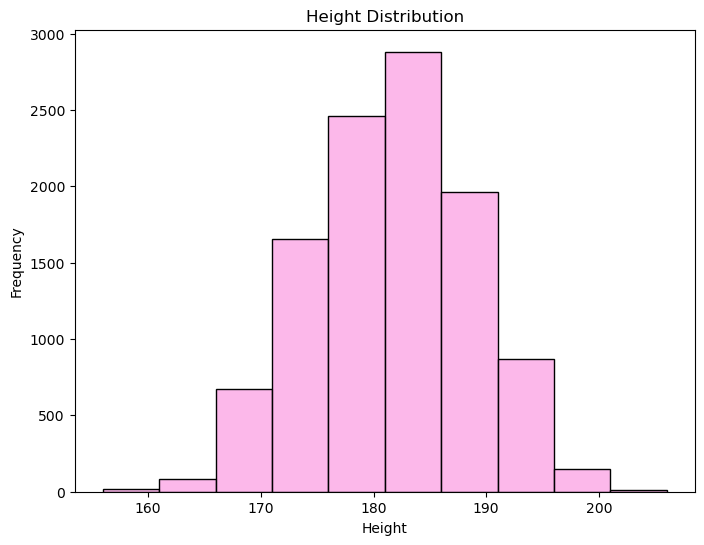

In [77]:
plt.figure(figsize=(8, 6))
sns.histplot(df['height'], bins=10, color='#fba0e3')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [78]:
df = df[(df['height'] >= 168) & (df['height'] <=195)] 

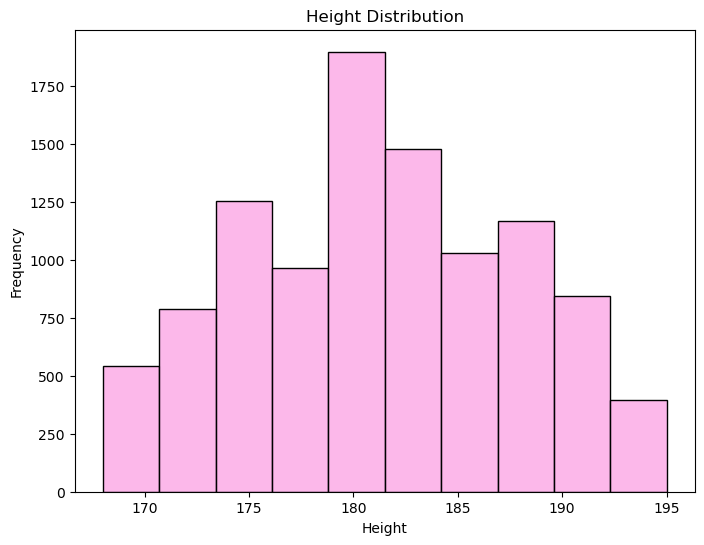

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(df['height'], bins=10, color='#fba0e3')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [83]:
df.shape

(10371, 21)

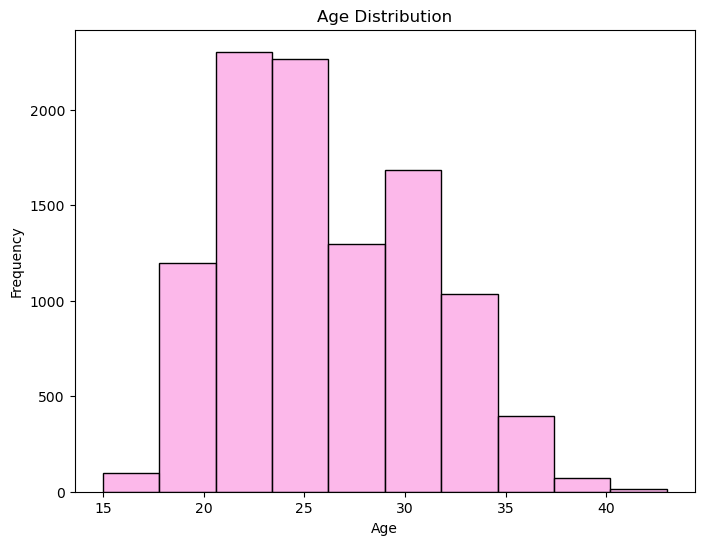

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10,color='#fba0e3')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [87]:
df = df[(df['age'] >= 18) & (df['age'] <=35)] 

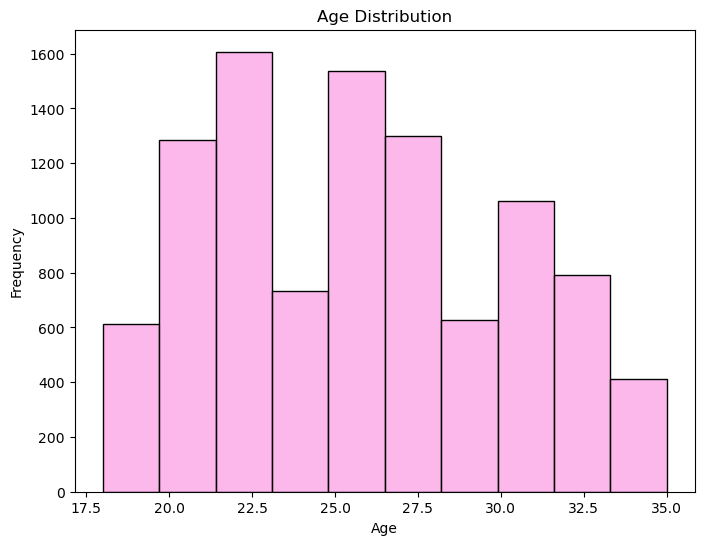

In [89]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10,color='#fba0e3')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [91]:
df.shape

(9958, 21)

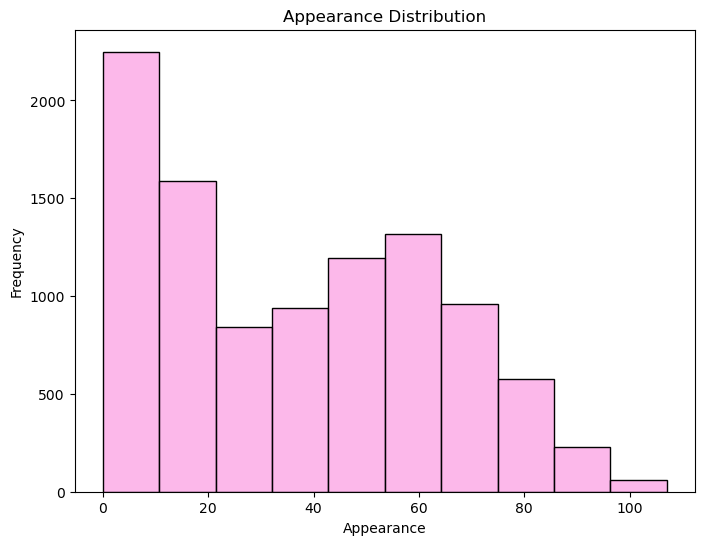

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(df['appearance'], bins=10, color='#fba0e3')
plt.title('Appearance Distribution')
plt.xlabel('Appearance')
plt.ylabel('Frequency')
plt.show()

In [95]:
df = df[(df['appearance'] <=97)]

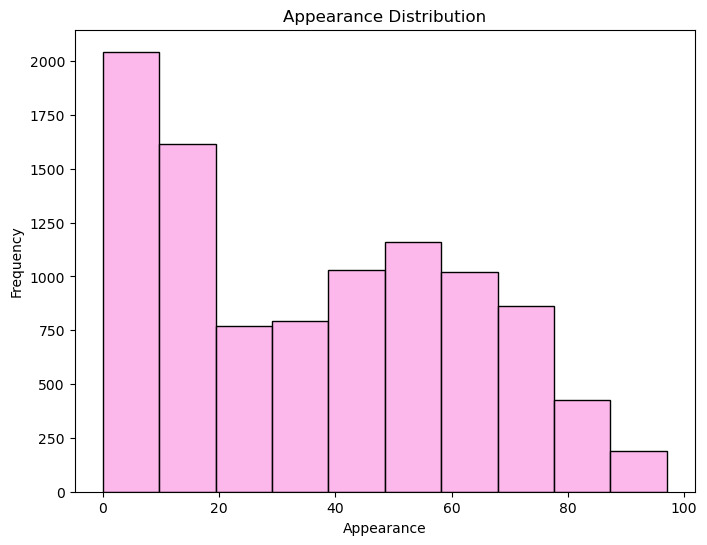

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(df['appearance'], bins=10, color='#fba0e3')
plt.title('Appearance Distribution')
plt.xlabel('Appearance')
plt.ylabel('Frequency')
plt.show()

In [99]:
df.shape

(9914, 21)

In [101]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,...,0.0,0.0,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,...,0.0,0.0,5031,238,51,21,40000000,80000000,2,0


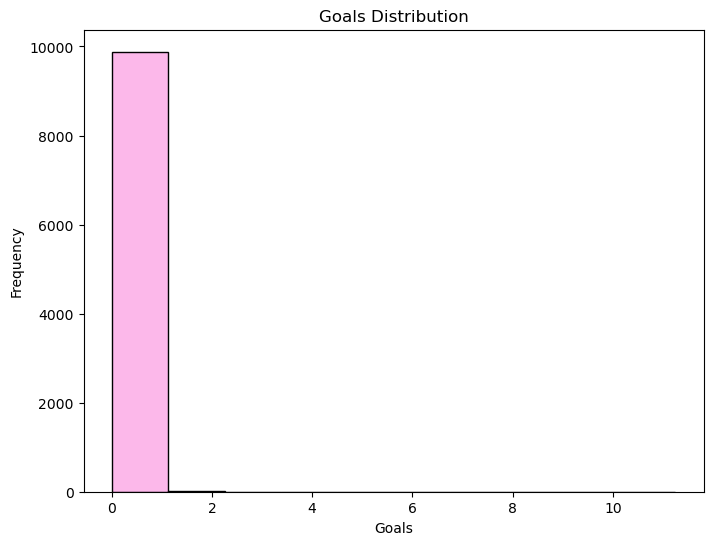

In [103]:
plt.figure(figsize=(8, 6))
sns.histplot(df['goals'], bins=10, color='#fba0e3')
plt.title('Goals Distribution')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

In [105]:
df = df[(df['goals'] <=0.5)]

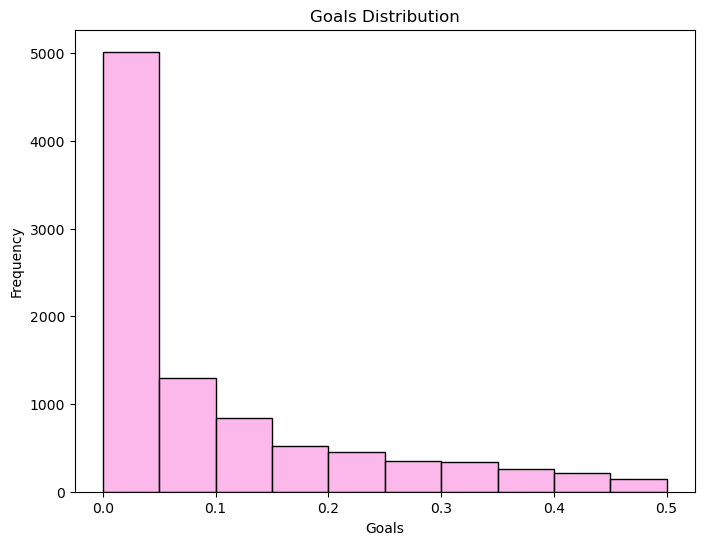

In [107]:
plt.figure(figsize=(8, 6))
sns.histplot(df['goals'], bins=10, color='#fba0e3')
plt.title('Goals Distribution')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

In [109]:
df.shape

(9433, 21)

In [111]:
df['assists'].head(10)

3     0.056180
4     0.017889
5     0.000000
6     0.032901
7     0.000000
8     0.000000
9     0.169115
10    0.063096
11    0.033507
12    0.048439
Name: assists, dtype: float64

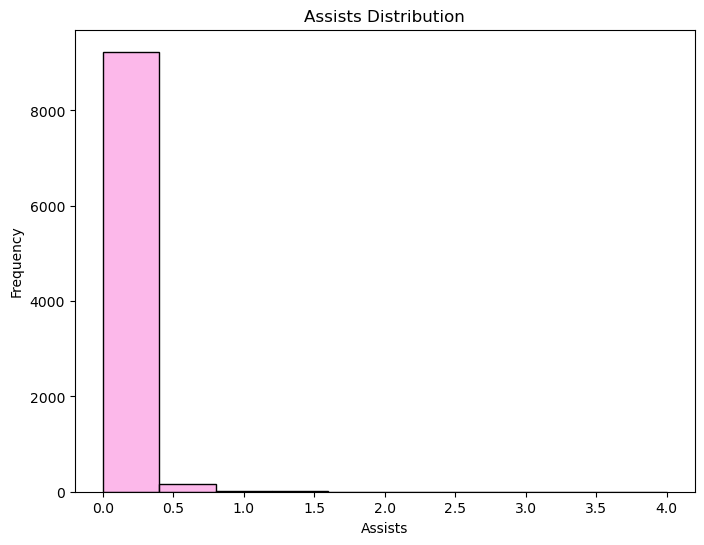

In [113]:
plt.figure(figsize=(8, 6))
sns.histplot(df['assists'], bins=10, color='#fba0e3')
plt.title('Assists Distribution')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

In [115]:
df = df[(df['assists'] <=0.28)]

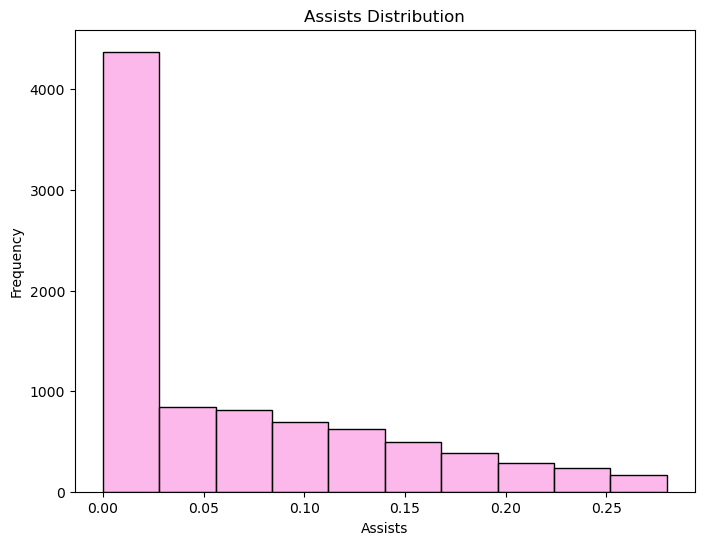

In [117]:
plt.figure(figsize=(8, 6))
sns.histplot(df['assists'], bins=10, color='#fba0e3')
plt.title('Assists Distribution')
plt.xlabel('Assists')
plt.ylabel('Frequency')
plt.show()

In [119]:
df.shape

(8908, 21)

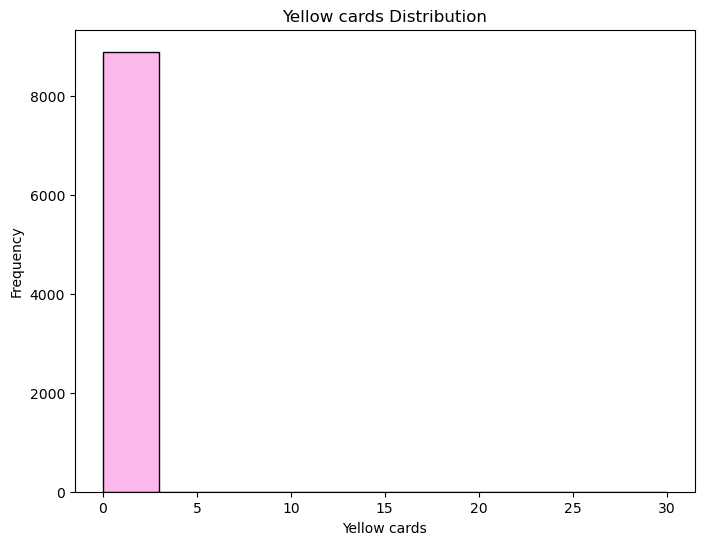

In [121]:
plt.figure(figsize=(8, 6))
sns.histplot(df['yellow cards'], bins=10, color='#fba0e3')
plt.title('Yellow cards Distribution')
plt.xlabel('Yellow cards')
plt.ylabel('Frequency')
plt.show()

In [123]:
df.shape

(8908, 21)

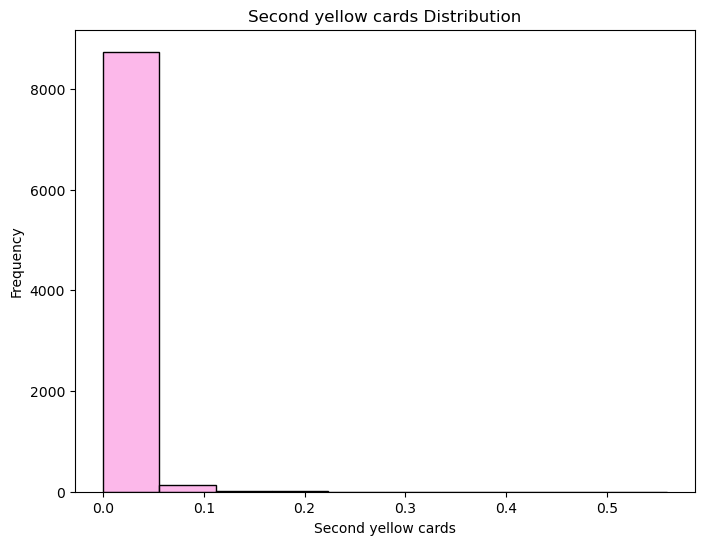

In [125]:
plt.figure(figsize=(8, 6))
sns.histplot(df['second yellow cards'], bins=10, color='#fba0e3')
plt.title('Second yellow cards Distribution')
plt.xlabel('Second yellow cards')
plt.ylabel('Frequency')
plt.show()

In [127]:
df = df[(df['second yellow cards'] <= 0.005)]

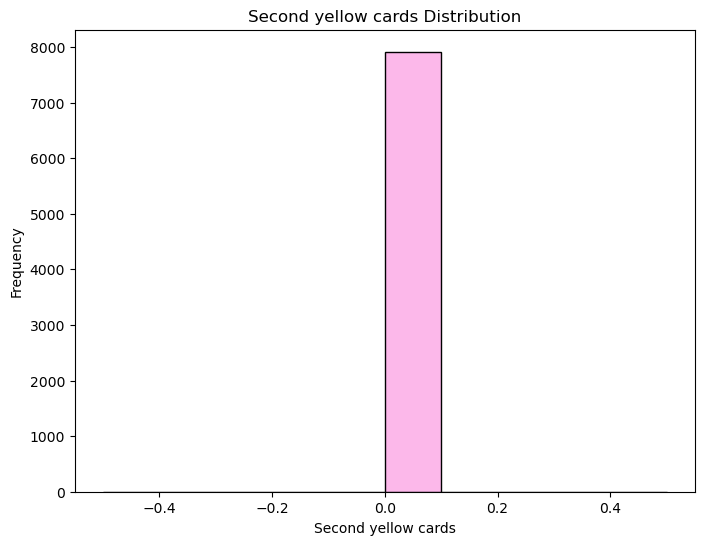

In [129]:
plt.figure(figsize=(8, 6))
sns.histplot(df['second yellow cards'], bins=10, color='#fba0e3')
plt.title('Second yellow cards Distribution')
plt.xlabel('Second yellow cards')
plt.ylabel('Frequency')
plt.show()

In [131]:
df.shape

(7916, 21)

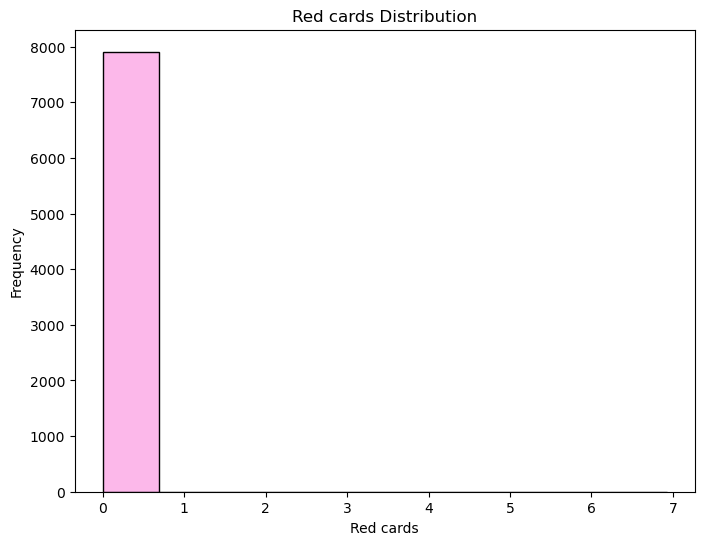

In [133]:
plt.figure(figsize=(8, 6))
sns.histplot(df['red cards'], bins=10, color='#fba0e3')
plt.title('Red cards Distribution')
plt.xlabel('Red cards')
plt.ylabel('Frequency')
plt.show()

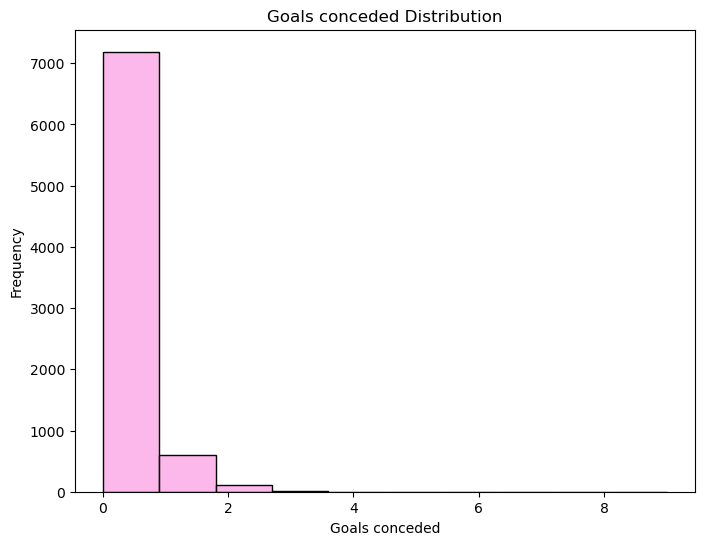

In [135]:
plt.figure(figsize=(8, 6))
sns.histplot(df['goals conceded'], bins=10, color='#fba0e3')
plt.title('Goals conceded Distribution')
plt.xlabel('Goals conceded')
plt.ylabel('Frequency')
plt.show()

In [137]:
df = df[(df['goals conceded'] <= 0.25)]

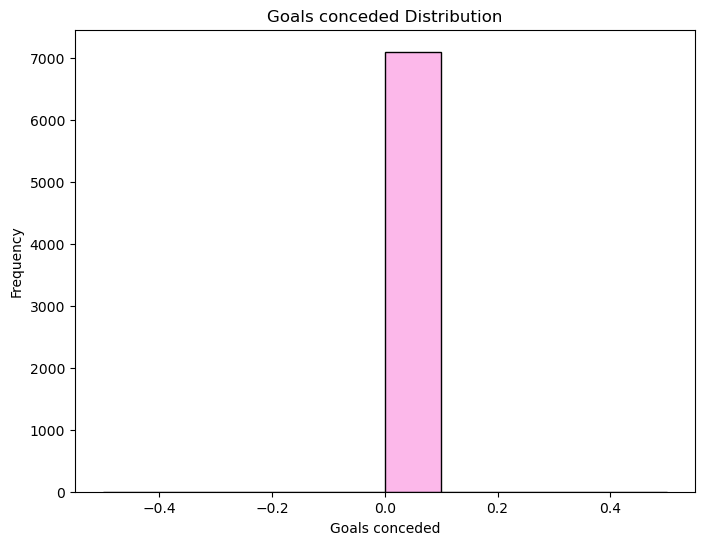

In [139]:
plt.figure(figsize=(8, 6))
sns.histplot(df['goals conceded'], bins=10, color='#fba0e3')
plt.title('Goals conceded Distribution')
plt.xlabel('Goals conceded')
plt.ylabel('Frequency')
plt.show()

In [141]:
df.shape

(7096, 21)

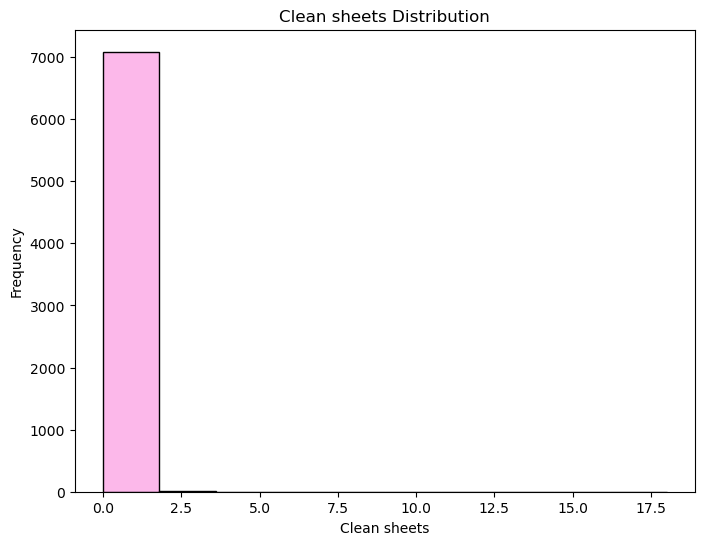

In [143]:
plt.figure(figsize=(8, 6))
sns.histplot(df['clean sheets'], bins=10, color='#fba0e3')
plt.title('Clean sheets Distribution')
plt.xlabel('Clean sheets')
plt.ylabel('Frequency')
plt.show()

In [145]:
df = df[(df['clean sheets'] <= 0.20)]

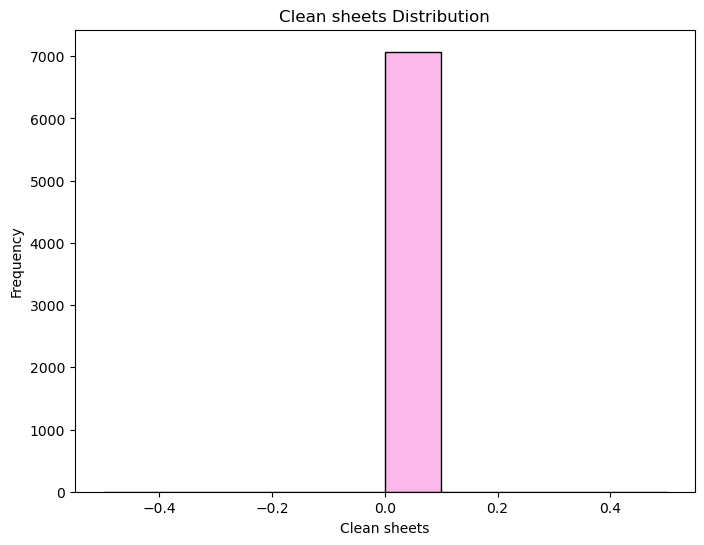

In [147]:
plt.figure(figsize=(8, 6))
sns.histplot(df['clean sheets'], bins=10, color='#fba0e3')
plt.title('Clean sheets Distribution')
plt.xlabel('Clean sheets')
plt.ylabel('Frequency')
plt.show()

In [149]:
df.shape

(7073, 21)

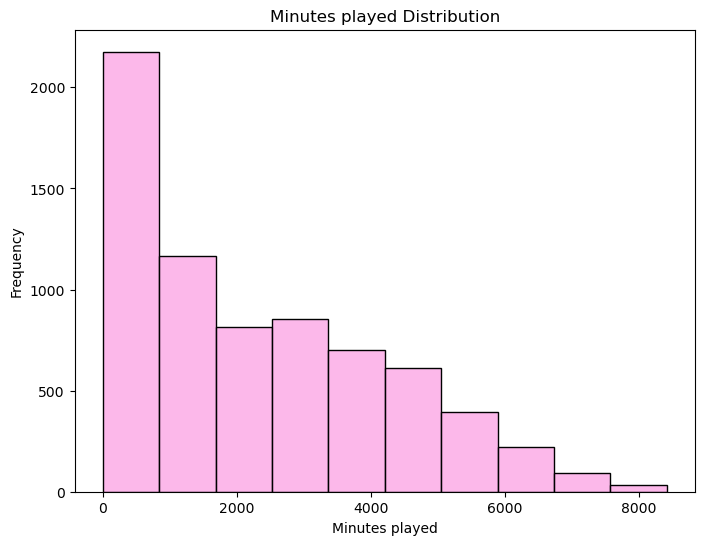

In [151]:
plt.figure(figsize=(8, 6))
sns.histplot(df['minutes played'], bins=10, color='#fba0e3')
plt.title('Minutes played Distribution')
plt.xlabel('Minutes played')
plt.ylabel('Frequency')
plt.show()

In [153]:
df = df[(df['minutes played'] <= 7500)]

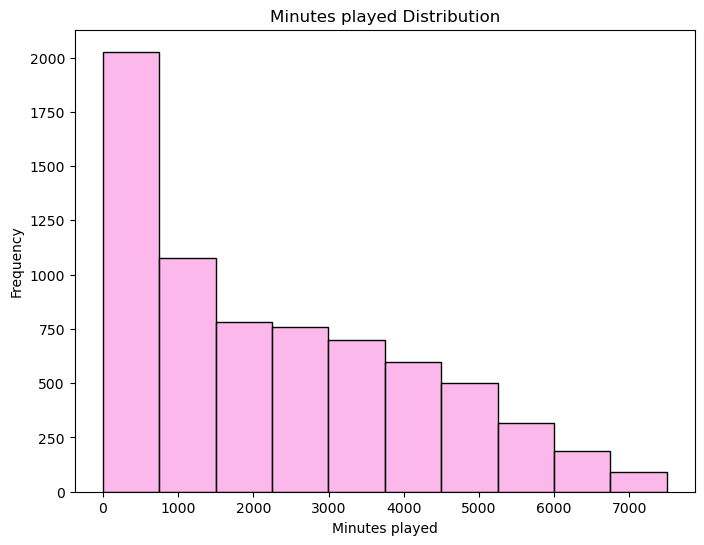

In [155]:
plt.figure(figsize=(8, 6))
sns.histplot(df['minutes played'], bins=10, color='#fba0e3')
plt.title('Minutes played Distribution')
plt.xlabel('Minutes played')
plt.ylabel('Frequency')
plt.show()

In [157]:
df.shape

(7036, 21)

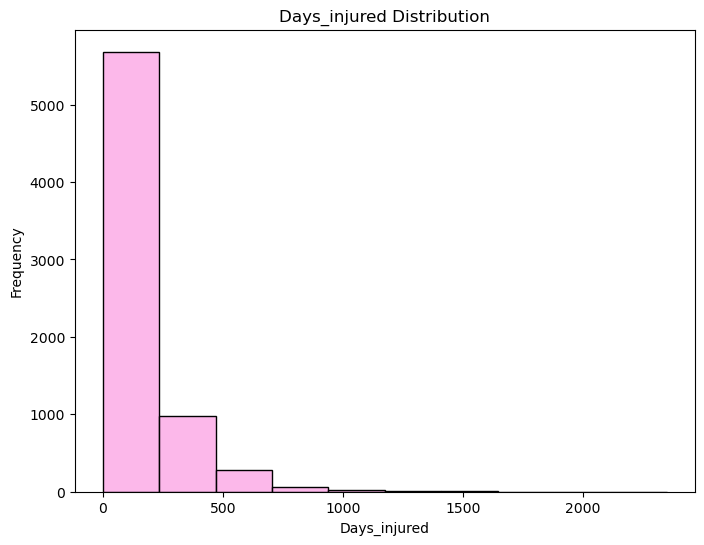

In [159]:
plt.figure(figsize=(8, 6))
sns.histplot(df['days_injured'], bins=10, color='#fba0e3')
plt.title('Days_injured Distribution')
plt.xlabel('Days_injured')
plt.ylabel('Frequency')
plt.show()

In [161]:
df = df[(df['days_injured'] <= 520)]

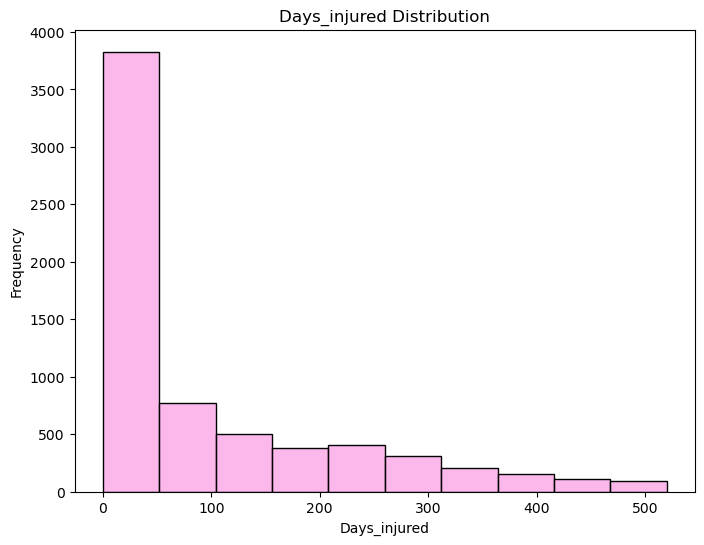

In [163]:
plt.figure(figsize=(8, 6))
sns.histplot(df['days_injured'], bins=10, color='#fba0e3')
plt.title('Days_injured Distribution')
plt.xlabel('Days_injured')
plt.ylabel('Frequency')
plt.show()

In [165]:
df.shape

(6754, 21)

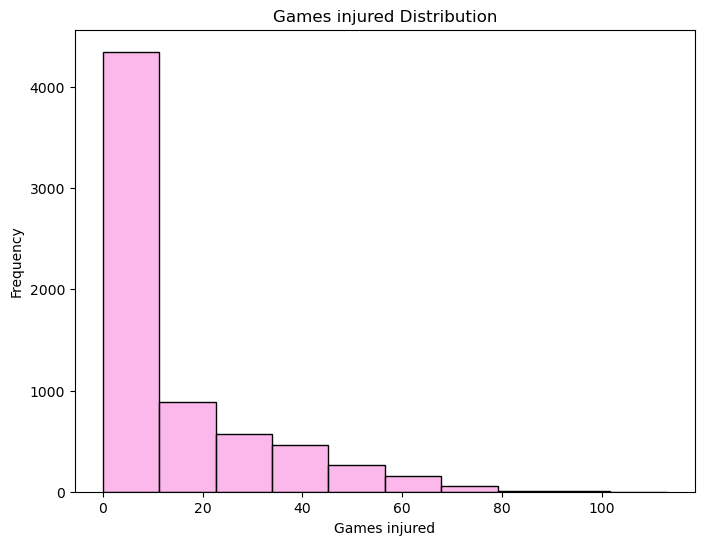

In [167]:
plt.figure(figsize=(8, 6))
sns.histplot(df['games_injured'], bins=10, color='#fba0e3')
plt.title('Games injured Distribution')
plt.xlabel('Games injured')
plt.ylabel('Frequency')
plt.show()

In [169]:
df = df[(df['games_injured'] <= 67)]

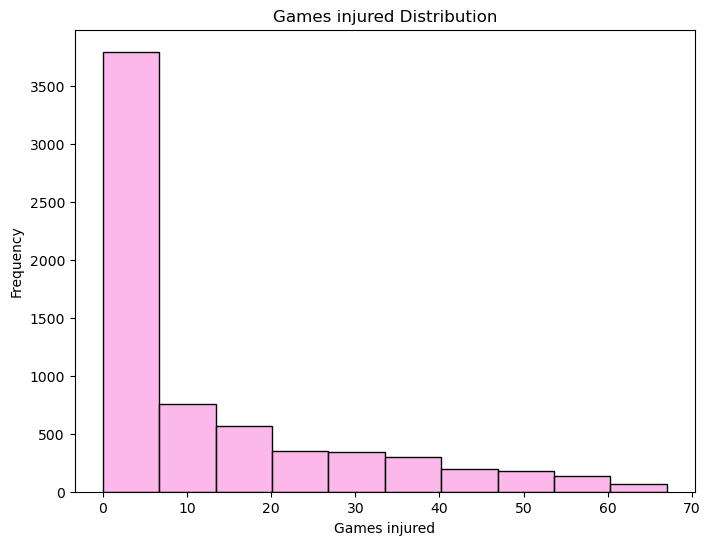

In [171]:
plt.figure(figsize=(8, 6))
sns.histplot(df['games_injured'], bins=10, color='#fba0e3')
plt.title('Games injured Distribution')
plt.xlabel('Games injured')
plt.ylabel('Frequency')
plt.show()

In [173]:
df.shape

(6685, 21)

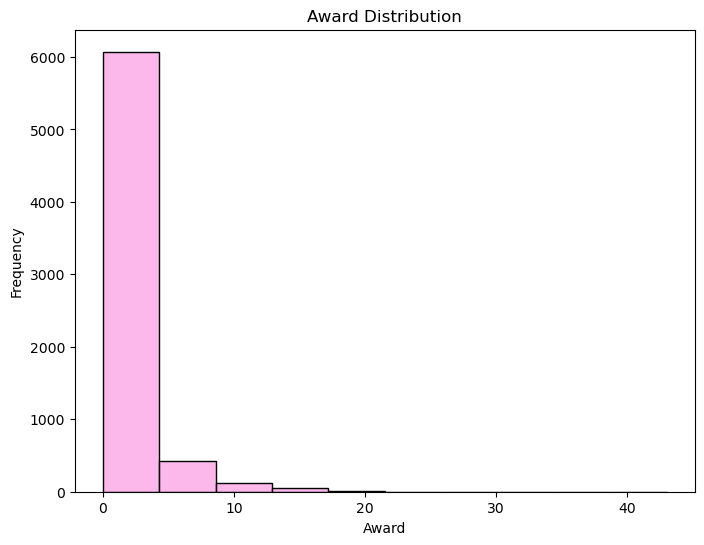

In [175]:
plt.figure(figsize=(8, 6))
sns.histplot(df['award'], bins=10, color='#fba0e3')
plt.title('Award Distribution')
plt.xlabel('Award')
plt.ylabel('Frequency')
plt.show()

In [177]:
df = df[(df['award'] <= 7)]

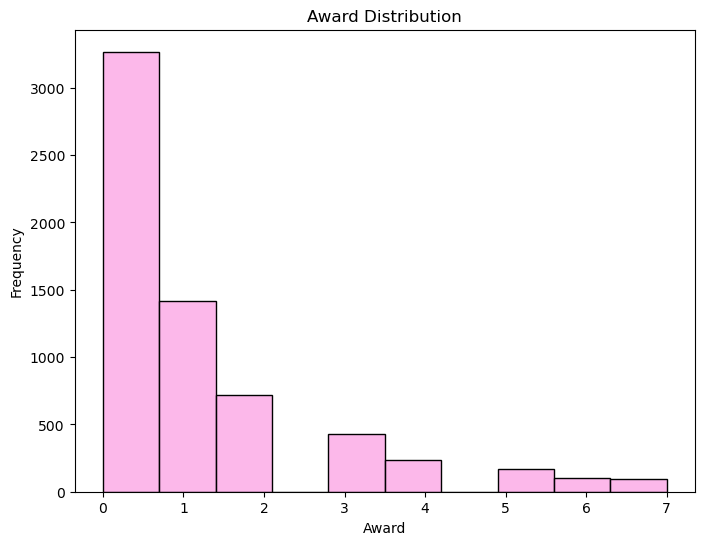

In [179]:
plt.figure(figsize=(8, 6))
sns.histplot(df['award'], bins=10, color='#fba0e3')
plt.title('Award Distribution')
plt.xlabel('Award')
plt.ylabel('Frequency')
plt.show()

In [181]:
df.shape

(6436, 21)

In [183]:
df.head(20)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.0,0.0,2758,47,13,0,2000000,2000000,2,0
10,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,0.0,...,0.0,0.0,7132,182,15,3,22000000,22000000,2,1
11,Manchester United,Brandon Williams,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,0.0,...,0.0,0.0,2686,175,28,1,10000000,12000000,2,1
12,Manchester United,Diogo Dalot,Defender Right-Back,183.0,24.0,72,0.032293,0.048439,0.226050,0.0,...,0.0,0.0,5574,328,49,3,35000000,35000000,2,1
13,Manchester United,Aaron Wan-Bissaka,Defender Right-Back,183.0,25.0,60,0.000000,0.018817,0.094083,0.0,...,0.0,0.0,4783,126,20,1,22000000,40000000,2,1
15,Manchester United,Scott McTominay,midfield-DefensiveMidfield,191.0,26.0,76,0.096010,0.038404,0.384041,0.0,...,0.0,0.0,4687,249,53,2,25000000,35000000,3,0
19,Manchester United,Donny van de Beek,midfield-CentralMidfield,184.0,26.0,31,0.155575,0.000000,0.155575,0.0,...,0.0,0.0,1157,378,65,6,17000000,55000000,3,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.0,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.0,0.0,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.0,0.0,3512,0,0,1,800000,800000,3,0
24,Manchester United,Jadon Sancho,Attack-LeftWinger,180.0,23.0,79,0.219780,0.109890,0.000000,0.0,...,0.0,0.0,4914,173,32,5,55000000,130000000,4,1


In [189]:
df['current_value'].max()

120000000

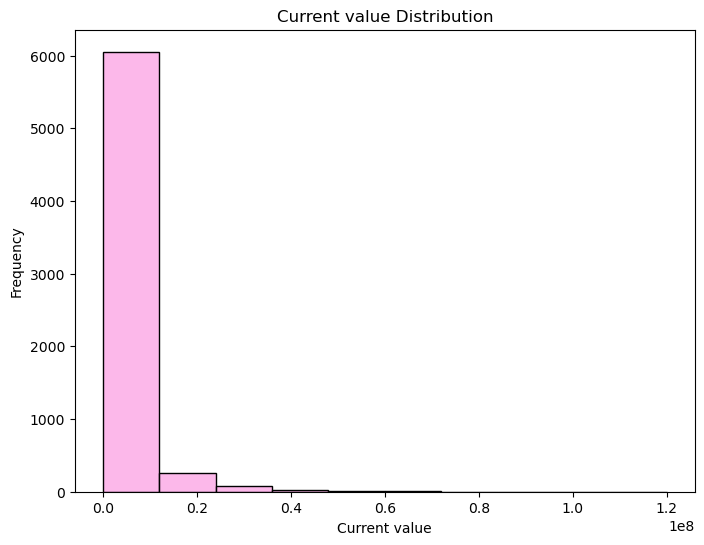

In [191]:
plt.figure(figsize=(8, 6))
sns.histplot(df['current_value'], bins=10, color='#fba0e3')
plt.title('Current value Distribution')
plt.xlabel('Current value')
plt.ylabel('Frequency')
plt.show()

In [193]:
df = df[(df['current_value'] <= 5200000)]

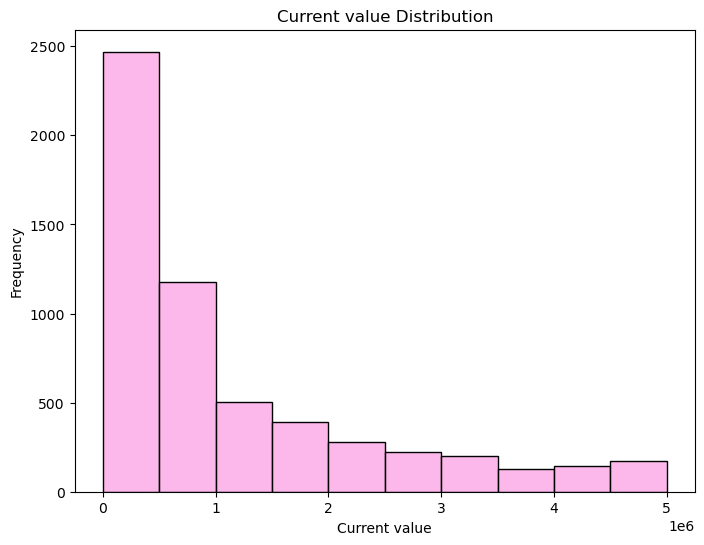

In [195]:
plt.figure(figsize=(8, 6))
sns.histplot(df['current_value'], bins=10, color='#fba0e3')
plt.title('Current value Distribution')
plt.xlabel('Current value')
plt.ylabel('Frequency')
plt.show()

In [197]:
df.shape

(5684, 21)

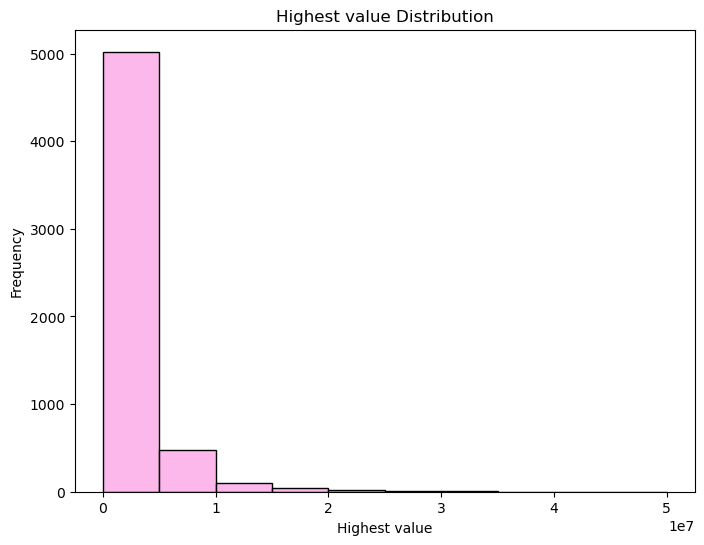

In [199]:
plt.figure(figsize=(8, 6))
sns.histplot(df['highest_value'], bins=10, color='#fba0e3')
plt.title('Highest value Distribution')
plt.xlabel('Highest value')
plt.ylabel('Frequency')
plt.show()

In [201]:
df = df[(df['highest_value'] <= 8000000)]

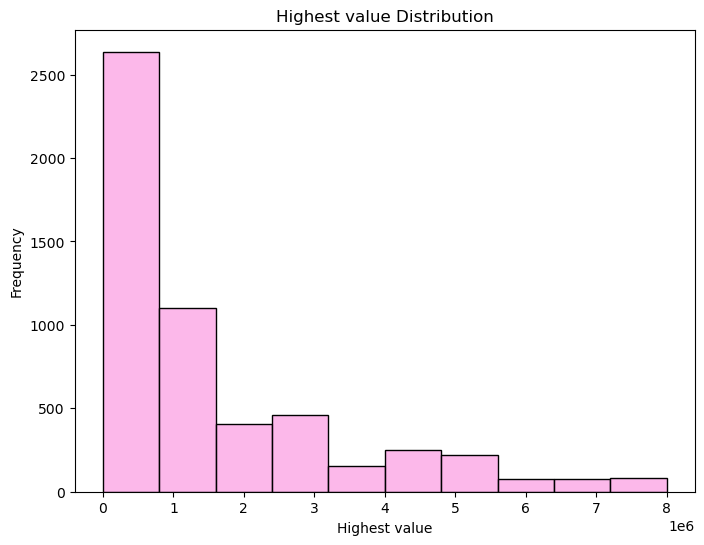

In [203]:
plt.figure(figsize=(8, 6))
sns.histplot(df['highest_value'], bins=10, color='#fba0e3')
plt.title('Highest value Distribution')
plt.xlabel('Highest value')
plt.ylabel('Frequency')
plt.show()

In [205]:
df.shape

(5470, 21)

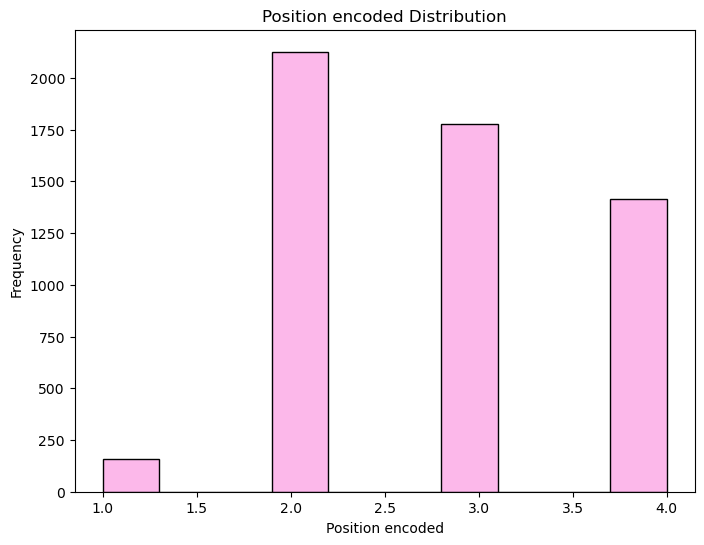

In [207]:
plt.figure(figsize=(8, 6))
sns.histplot(df['position_encoded'], bins=10, color='#fba0e3')
plt.title('Position encoded Distribution')
plt.xlabel('Position encoded')
plt.ylabel('Frequency')
plt.show()

In [209]:
df = df[(df['position_encoded'] >= 1.8)]

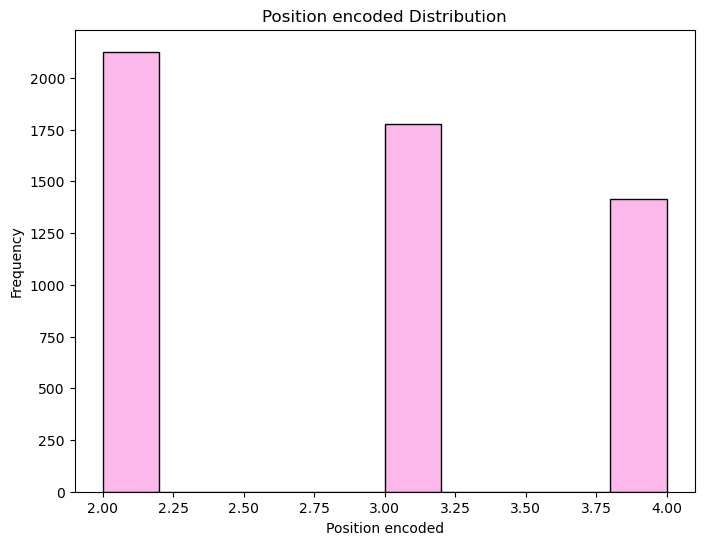

In [211]:
plt.figure(figsize=(8, 6))
sns.histplot(df['position_encoded'], bins=10, color='#fba0e3')
plt.title('Position encoded Distribution')
plt.xlabel('Position encoded')
plt.ylabel('Frequency')
plt.show()

In [213]:
df.shape

(5313, 21)

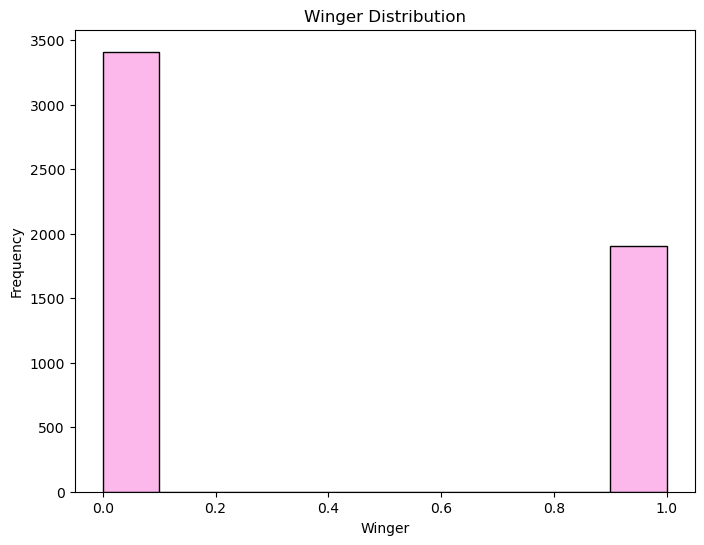

In [216]:
plt.figure(figsize=(8, 6))
sns.histplot(df['winger'], bins=10, color='#fba0e3')
plt.title('Winger Distribution')
plt.xlabel('Winger')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='award', ylabel='Count'>

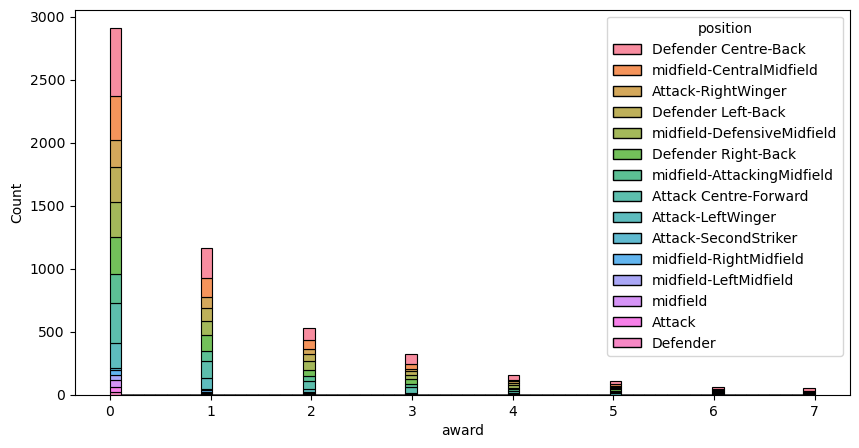

In [218]:
plt.figure(figsize=(10,5))
sns.histplot(
    df,
    x="award",
    hue="position", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [220]:
df.shape

(5313, 21)

In [222]:
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [224]:
df.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [226]:
categorical_features = ['position', 'team' , 'name']

In [228]:
for i in categorical_features:
    print (df[i].value_counts())

position
Defender Centre-Back          1057
midfield-CentralMidfield       645
Attack Centre-Forward          608
Defender Right-Back            536
midfield-DefensiveMidfield     535
Defender Left-Back             504
midfield-AttackingMidfield     406
Attack-RightWinger             389
Attack-LeftWinger              345
midfield-RightMidfield          68
midfield-LeftMidfield           62
midfield                        59
Attack                          39
Attack-SecondStriker            31
Defender                        29
Name: count, dtype: int64
team
FC Seoul                35
Swallows FC             32
Gangwon FC              32
Maritzburg United FC    32
Royal AM FC             31
                        ..
Sevilla FC               1
Olympique Lyon           1
Everton FC               1
Paris Saint-Germain      1
Southampton FC           1
Name: count, Length: 363, dtype: int64
name
Guilherme               3
Vitinho                 3
Gun-hee Kim             2
Alan Franco     

In [230]:
team_counts = df['team'].value_counts()
df = df[df['team'].isin(team_counts[team_counts >= 2].index)]

In [232]:
df.shape

(5305, 21)

In [234]:
df.to_csv(r"C:\Users\almal\Desktop\cleaned_final_data.csv", index=False)

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
height,5305.0,1.800215e+02,5.996376e+00,168.0,175.000000,180.000000,1.840000e+02,1.950000e+02
age,5305.0,2.529170e+01,4.268659e+00,18.0,22.000000,25.000000,2.900000e+01,3.500000e+01
appearance,5305.0,3.043751e+01,2.350611e+01,0.0,10.000000,25.000000,5.000000e+01,9.600000e+01
goals,5305.0,8.991654e-02,1.203063e-01,0.0,0.000000,0.038200,1.371429e-01,4.981550e-01
assists,5305.0,6.080084e-02,7.491860e-02,0.0,0.000000,0.027125,1.088008e-01,2.799634e-01
yellow cards,5305.0,2.157619e-01,5.784564e-01,0.0,0.059211,0.162912,2.660099e-01,3.000000e+01
second yellow cards,5305.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
red cards,5305.0,8.158445e-03,1.109558e-01,0.0,0.000000,0.000000,0.000000e+00,6.923077e+00
goals conceded,5305.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
clean sheets,5305.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00


In [239]:
df.describe(include='object').T

,count,unique,top,freq
team,5305,355,FC Seoul,35
name,5305,5265,Guilherme,3
position,5305,15,Defender Centre-Back,1056


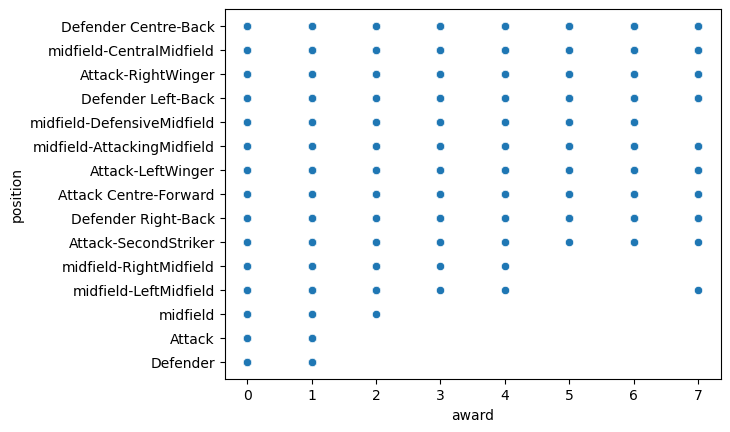

In [242]:
sns.scatterplot(y='position', x='award',
                data=df)

plt.show()

In [244]:
corr_matrix = df.select_dtypes(include=np.number).corr()
corr_matrix

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
height,1.000000,0.016594,0.079159,0.000357,-0.136353,-0.004786,NaN,-0.003162,NaN,NaN,0.119846,0.070011,0.069660,0.025339,0.066650,0.066792,-0.204496,-0.316304
age,0.016594,1.000000,0.174756,0.018986,0.052176,0.014854,NaN,0.003115,NaN,NaN,0.203328,0.295596,0.307889,0.359544,0.018175,0.274031,-0.059277,-0.004641
appearance,0.079159,0.174756,1.000000,0.296670,0.394909,-0.045775,NaN,-0.026160,NaN,NaN,0.945458,0.128755,0.131659,0.122292,0.364924,0.345683,0.026193,0.047639
goals,0.000357,0.018986,0.296670,1.000000,0.374767,-0.038708,NaN,-0.015149,NaN,NaN,0.189927,0.046062,0.040665,0.077564,0.124815,0.126886,0.467165,-0.033154
assists,-0.136353,0.052176,0.394909,0.374767,1.000000,-0.040318,NaN,-0.022385,NaN,NaN,0.312008,0.090294,0.091529,0.094194,0.196687,0.199040,0.248330,0.179390
yellow cards,-0.004786,0.014854,-0.045775,-0.038708,-0.040318,1.000000,NaN,-0.004791,NaN,NaN,-0.051595,0.022376,0.019769,-0.002578,-0.001462,0.006053,0.028058,-0.015824
second yellow cards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
red cards,-0.003162,0.003115,-0.026160,-0.015149,-0.022385,-0.004791,NaN,1.000000,NaN,NaN,-0.025089,-0.004074,-0.004328,-0.010570,-0.002557,-0.001297,0.010179,-0.013204
goals conceded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clean sheets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


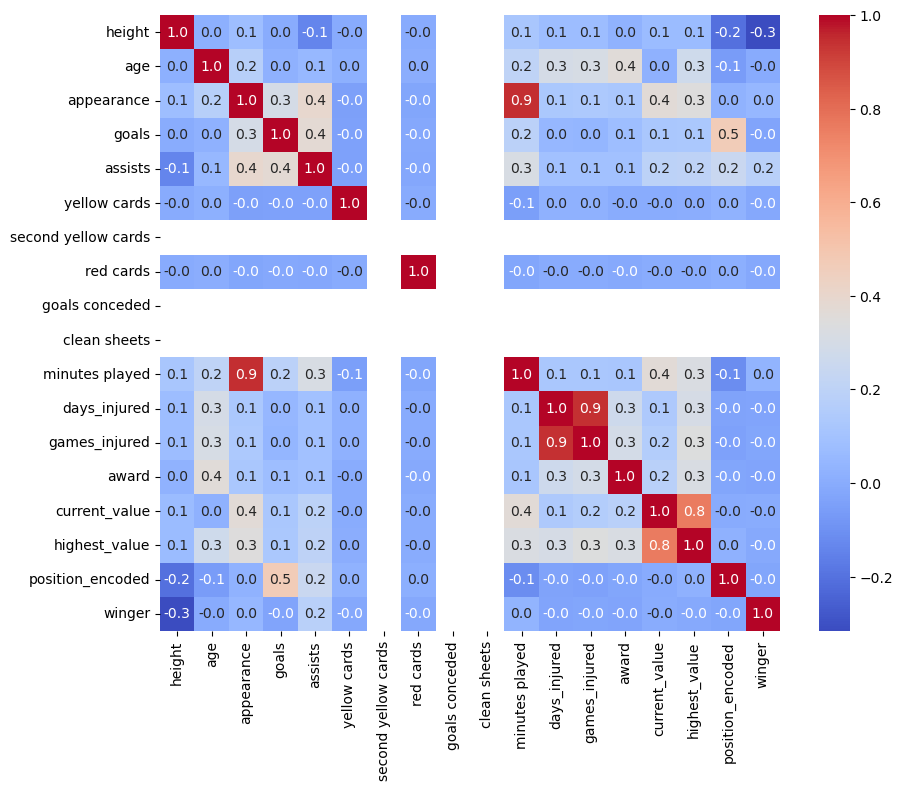

In [246]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

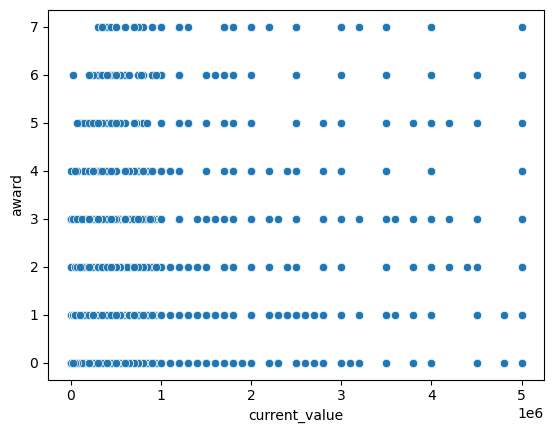

In [251]:
sns.scatterplot(y='award', x='current_value',
                data=df)

plt.show()